In [3]:
import pandas as pd
import numpy as np
from joblib import dump, load


In [2]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
clf = load('model.joblib')

In [8]:
df =  pd.read_csv('.\\test.csv', index_col='Client')

In [12]:
cols = ['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD',
 'Count_CC', 'Count_CL','Has_ActBal_CA', 'Has_ActBal_SA', 'Has_ActBal_MF', 'Has_ActBal_OVD',
 'Has_ActBal_CC', 'Has_ActBal_CL', 'Has_VolumeCred', 'Has_VolumeCred_CA',
 'Has_TransactionsCred', 'Has_TransactionsCred_CA', 'Has_VolumeDeb',
 'Has_VolumeDeb_CA', 'Has_VolumeDebCash_Card', 'Has_VolumeDebCashless_Card',
 'Has_VolumeDeb_PaymentOrder', 'Has_TransactionsDeb',
 'Has_TransactionsDeb_CA', 'Has_TransactionsDebCash_Card',
 'Has_TransactionsDebCashless_Card', 'Has_TransactionsDeb_PaymentOrder',
 'VolumeCred_bin', 'binned_ActBal_CA', 'binned_VolumeCred',
 'binned_VolumeCred_CA', 'binned_TransactionsCred',
 'binned_TransactionsCred_CA', 'binned_VolumeDeb', 'binned_VolumeDeb_CA',
 'binned_VolumeDebCash_Card', 'binned_VolumeDebCashless_Card',
 'binned_VolumeDeb_PaymentOrder', 'binned_TransactionsDeb',
 'binned_TransactionsDeb_CA', 'binned_TransactionsDebCash_Card',
 'binned_TransactionsDebCashless_Card',
 'binned_TransactionsDeb_PaymentOrder']

In [13]:
df[cols]

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,Has_ActBal_CA,...,binned_VolumeDeb,binned_VolumeDeb_CA,binned_VolumeDebCash_Card,binned_VolumeDebCashless_Card,binned_VolumeDeb_PaymentOrder,binned_TransactionsDeb,binned_TransactionsDeb_CA,binned_TransactionsDebCash_Card,binned_TransactionsDebCashless_Card,binned_TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,
909,0,21,27,1,0.0,0.0,1.0,0.0,1.0,1.0,...,2,2,1,1,1,1,1,1,1,1
699,0,37,175,1,0.0,4.0,1.0,0.0,0.0,1.0,...,3,2,1,1,2,1,1,1,1,1
528,1,19,70,1,0.0,0.0,1.0,0.0,0.0,0.0,...,2,2,1,1,1,1,1,1,1,1
1145,0,61,45,1,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,1,1,1,1,1,1,1,1
517,1,41,28,1,0.0,0.0,0.0,0.0,0.0,1.0,...,2,2,1,2,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1,33,82,1,0.0,0.0,1.0,0.0,0.0,1.0,...,3,3,1,1,1,1,1,1,1,1
1024,0,65,13,1,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,1,1,1,1,1,1,1,1
464,0,68,153,2,0.0,0.0,1.0,0.0,0.0,1.0,...,2,2,1,1,2,1,1,1,1,1


In [32]:
pred = clf.predict_proba(df[cols])
pred

array([[0.40481421, 0.08649674, 0.04567501, 0.46301404],
       [0.13701582, 0.14397148, 0.15871716, 0.56029554],
       [0.07995572, 0.01153188, 0.01729684, 0.89121556],
       ...,
       [0.35229819, 0.06732635, 0.35935012, 0.22102533],
       [0.33724484, 0.16005415, 0.18767283, 0.31502818],
       [0.42653721, 0.08334552, 0.30332575, 0.18679152]])

In [79]:

index_of_max = np.where(pred == np.amax(pred[0]))
index_of_max[0][0]

best_predictions = []

for i, prediction in enumerate(pred):
    maxElement = np.amax(prediction)

    index_of_max = np.where(prediction == np.amax(prediction))
    index_of_max[0][0]
    best_predictions.append([df.index[i],index_of_max[0][0],maxElement])

In [84]:
pred_df = pd.DataFrame(best_predictions, columns = ['Client','label', 'prob'])

In [78]:
df.index[0]

909

In [88]:
pred_df.set_index('Client', inplace = True)

In [89]:
pred_df

,label,prob
Client,,
909,3,0.463014
699,3,0.560296
528,3,0.891216
1145,0,0.568621
517,0,0.570659
...,...,...
419,0,0.472253
1024,0,0.432083
464,2,0.359350


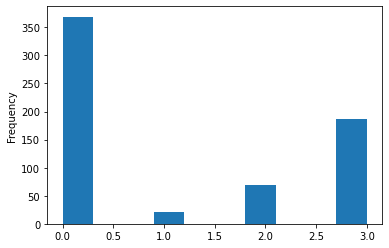

In [69]:
pred_df['label'].plot.hist()

In [71]:
simp_df =  pd.read_csv('.\\simplifid_data.csv', index_col='Client')

In [ ]:
# Distro of labels in training set is very similar to prediction set. If the model was improved that would suggest that that these would also match again and given that the data looks quite similar in my data reports I would expect the ratios of predictions to be the same.

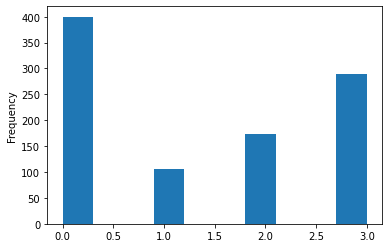

In [72]:
simp_df['Catagory_Label'].plot.hist()

In [93]:
pred_df.sort_values('prob', ascending = False)

,label,prob
Client,,
350,3,0.970712
231,3,0.940873
41,3,0.930580
878,3,0.922191
706,3,0.918645
...,...,...
1310,2,0.304045
594,2,0.299154
897,0,0.296964


In [94]:
zero_preds = pred_df[ pred_df['label'] == 0 ]

In [95]:
pred_df.drop(indexNames , inplace=True)

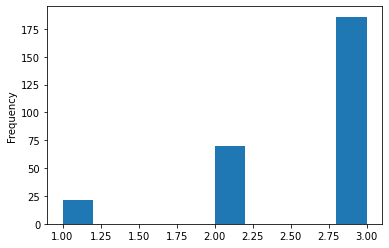

In [96]:
pred_df['label'].plot.hist()

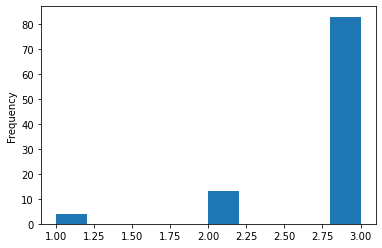

In [105]:
pred_df.sort_values('prob', ascending = False)[:100]['label'].plot.hist()

In [109]:
pred_df.sort_values('prob', ascending = False)[:100]['prob'].describe()

count    100.000000
mean       0.714395
std        0.110698
min        0.549357
25%        0.623040
50%        0.687301
75%        0.803171
max        0.970712
Name: prob, dtype: float64

In [112]:
pred_df[pred_df['label'] == 1]

,label,prob
Client,,
1218,1,0.554308
18,1,0.441063
63,1,0.343641
976,1,0.322356
1088,1,0.419389
633,1,0.446072
468,1,0.331215
211,1,0.490465
756,1,0.724977


In [ ]:
# From the below figure we can see the maximum revenue one could obtain from the training set

In [114]:
simp_df['Top_Value'].sum()

7278.7071428571435

In [ ]:
# But as we can see most people in the dataset naturally return very little money

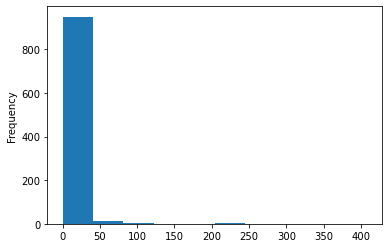

In [115]:
simp_df['Top_Value'].plot.hist()

In [ ]:
# In a previous notebook I showed that you could obtain 30% of the maximum revenue from the top 20 values in the dataset. Here it is again

In [116]:
simp_df['Top_Value'].describe()

count    969.000000
mean       7.511566
std       20.820257
min        0.000000
25%        0.000000
50%        2.008393
75%        9.302500
max      407.962500
Name: Top_Value, dtype: float64

In [124]:
simp_df.sort_values('Top_Value', ascending = False)[:20]['Top_Value'].sum()/simp_df['Top_Value'].sum()

0.2989216344346867

In [125]:
20/969

0.02063983488132095

In [ ]:
# Not quite the expression of the 1% holding the most value but you get the idea

In [126]:
simp_df.sort_values('Top_Value', ascending = False)[:10]['Top_Value'].sum()/simp_df['Top_Value'].sum()

0.22546373031317374

In [127]:
10/969

0.010319917440660475

In [ ]:
# at the 1% mark we see that 22% of the total revenue exists here

In [ ]:
# It is for this reason that any sort of model will most likely not be able to not be able to predict the expected revenue for these individuals with high accuracy. In my inital model I tried to fit a linear model onto the data points of my train set but my model was primitive and not well thought through. Even so when I reviewed the results I saw that I was unable to predict past a value 40 units of revenue with my test set. Even so I had very few examples in this upper revenue predictions so most of my values converged at the median values.

In [ ]:
# It is for this reason that I suggest that if I was to continue building on I would try and build out a better model for predicting revenue. But given the shortomings in this data I have strong doubts that it would be very accurate.  

In [ ]:
# Below this is the distrubution of the top 100 values in the training set

In [134]:
simp_df.sort_values('Top_Value', ascending = False)[:100]['Catagory_Label'].value_counts(normalize=True)

3    0.70
2    0.16
1    0.14
Name: Catagory_Label, dtype: float64

In [ ]:
# I would recommend to return the top values in the below ratios illustracted in the pie chart

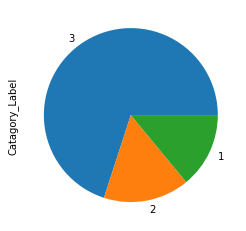

In [142]:
simp_df.sort_values('Top_Value', ascending = False)[:100]['Catagory_Label'].value_counts(normalize=True).plot.pie()

In [ ]:
# 3 = Consumer Loan
# 2 = Credit Card
# 1 = Mutual fund

In [ ]:
# Now you might be wondering why I'm suggesting this. Well I will tell you why. Given that label Consumer loans make up the majority of the highest value in the training dataset, I think it is fair to assume that the highest yield products would be similar. In this vain I would suggest that 

# The 70 highest probable people for with label 3
# The 16 highest probable people for with label 2
# The 14 highest probable people for with label 1

In [ ]:
# Given these ratios, I can calculate a conservative estimate of predicted revenue based on the median value of these columns

In [159]:
median_ml = simp_df[(simp_df['Revenue_MF'] != 0)]['Revenue_MF'].median()

In [160]:
median_cc = simp_df[(simp_df['Revenue_CC'] != 0)]['Revenue_CC'].median()

In [161]:
median_cl = simp_df[(simp_df['Revenue_CL'] != 0)]['Revenue_CL'].median()

In [170]:
ml, cc, cl = 14, 16, 70
renenue = (ml*median_ml + cc*median_cc + cl* median_cl)

In [172]:
renenue

865.1614285714285

In [173]:
import json

In [192]:
recommended_mutual_fund = pred_df.loc[pred_df['label'] ==1].sort_values('prob', ascending = False)[:14]

In [193]:
recommended_cc = pred_df.loc[pred_df['label'] ==2].sort_values('prob', ascending = False)[:16]

In [194]:
recommended_cl = pred_df.loc[pred_df['label'] ==3].sort_values('prob', ascending = False)[:70]

In [199]:
recommendations =  pd.concat([recommended_mutual_fund, recommended_cc, recommended_cl])

In [200]:
recommendations.to_csv('.\\client_recommendations.csv')